<a href="https://colab.research.google.com/github/Wapiti08/GML/blob/main/repre_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install pywin32==225
!pip3 install networkx==2.4
!pip3 install node2vec

ERROR: Could not find a version that satisfies the requirement pywin32==225 (from versions: none)
ERROR: No matching distribution found for pywin32==225
     |████████████████████████████████| 1.6 MB 3.1 MB/s 
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=a07284ab89296214cf0260723f6df3ccfc12517f77a49feb2fb850a9e42744fe
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [8]:
import networkx as nx

graph = nx.barbell_graph(7,4)

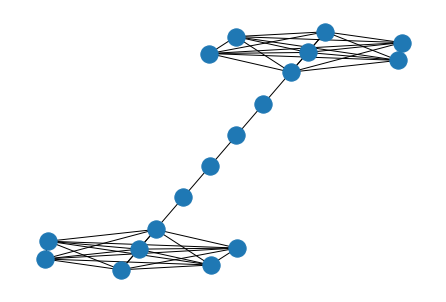

In [9]:
nx.draw_kamada_kawai(graph)

## Node to Vector

In [23]:
from node2vec import Node2Vec

node_vec = Node2Vec(graph, dimensions=2)
model = node_vec.fit(window=10)

Computing transition probabilities:   0%|          | 0/18 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 16.69it/s]


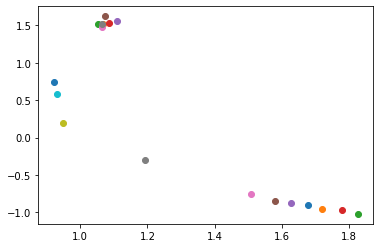

In [24]:
import matplotlib.pyplot as plt
for node in graph.nodes():
  v = model.wv.get_vector(str(node))
  plt.scatter(v[0], v[1])

## Edge to Vector

In [29]:
from node2vec.edges import HadamardEmbedder

Model_edge = HadamardEmbedder(keyed_vectors = model.wv)

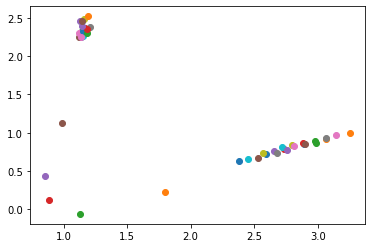

In [34]:
for edge in graph.edges():
  edge_vec = Model_edge[(str(edge[0]), str(edge[1]))]
  plt.scatter(edge_vec[0], edge_vec[1])

## Graph to Vector